In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('data/DataTable.csv')
walkability_df = pd.read_csv('data/walkability_scores.csv')
walkability_df.head()
df = pd.concat([data, walkability_df], axis=1)

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'distance_to_airport',
       'distance_to_seahawks_stadium', 'distance_to_seattle_center',
       'distance_to_kerry_park', 'distance_to_discovery_park',
       'minimum_distance_to_metro', 'population', 'land', 'population_density',
       'units', 'units_occupied', 'med_value', 'med_income', 'calc_pd',
       'walk_score', 'walk_score'],
      dtype='object')

In [4]:
df = df.loc[:,~df.columns.duplicated()]# walk_Score is 2d. This is because walk_Score is duplicated in our data file.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21420 non-null  int64  
 1   date                          21420 non-null  object 
 2   price                         21420 non-null  float64
 3   bedrooms                      21420 non-null  int64  
 4   bathrooms                     21420 non-null  float64
 5   sqft_living                   21420 non-null  int64  
 6   sqft_lot                      21420 non-null  int64  
 7   floors                        21420 non-null  float64
 8   waterfront                    21420 non-null  float64
 9   view                          21420 non-null  float64
 10  condition                     21420 non-null  int64  
 11  grade                         21420 non-null  int64  
 12  sqft_above                    21420 non-null  int64  
 13  s

In [6]:
#drop columns that won't be useful or are repeated
df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long', 'units', 'population', 
                 'units_occupied', 'med_value', 'population_density', 'land'], inplace=True)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,5650,4.862539,6.771217,8.837087,9.483657,12.249694,1.302968,58707.0,4967.42268,39
1,205425.0,2,1.00,880,6780,1.0,0.0,0.0,4,6,...,6780,4.514162,7.598140,9.663983,10.310590,13.074902,2.089548,58707.0,4967.42268,62
2,445000.0,3,2.25,2100,8201,1.0,0.0,2.0,3,8,...,8712,5.076186,7.222682,9.278340,9.927283,12.720516,1.894527,58707.0,4967.42268,23
3,236000.0,3,1.00,1300,5898,1.0,0.0,0.0,3,7,...,7619,4.564977,7.170015,9.237631,9.883293,12.639671,1.643102,58707.0,4967.42268,29
4,170000.0,2,1.00,860,5265,1.0,0.0,0.0,3,6,...,8775,4.147126,6.839175,8.907012,9.545065,12.244964,1.264256,58707.0,4967.42268,80


In [7]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,...,12775.718161,13.330562,11.408495,12.013397,12.284533,13.983176,6.970616,81151.809944,4294.850826,40.003361
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,...,27345.621867,5.912335,6.406267,7.098593,7.323247,8.042231,4.979949,24184.833310,2959.739674,28.561745
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,0.794968,0.781762,0.328556,0.086093,0.156062,0.039381,40815.000000,41.211905,0.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,8.405874,6.308190,6.177725,6.415543,7.475380,3.335343,63709.000000,2185.126582,14.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,13.487255,10.390095,10.670040,10.919394,13.131834,5.974098,77688.000000,3975.248933,36.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10086.250000,17.535100,15.453381,16.681599,17.154461,19.658747,9.415636,95043.000000,6311.948867,65.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,49.875319,48.146469,48.787233,49.098762,51.018345,46.338136,183833.000000,15844.274809,99.000000


In [8]:
df.loc[df['bedrooms'] > 12]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
5368,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,...,4700,16.44744,6.397437,4.654191,4.24761,4.065119,2.91604,75763.0,9894.612069,65


In [9]:
df.loc[df['bedrooms'] > 12, 'bedrooms'] = 3

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,distance_to_airport,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,...,12775.718161,13.330562,11.408495,12.013397,12.284533,13.983176,6.970616,81151.809944,4294.850826,40.003361
std,3.679311e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,...,27345.621867,5.912335,6.406267,7.098593,7.323247,8.042231,4.979949,24184.833310,2959.739674,28.561745
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,0.794968,0.781762,0.328556,0.086093,0.156062,0.039381,40815.000000,41.211905,0.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,8.405874,6.308190,6.177725,6.415543,7.475380,3.335343,63709.000000,2185.126582,14.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,13.487255,10.390095,10.670040,10.919394,13.131834,5.974098,77688.000000,3975.248933,36.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10086.250000,17.535100,15.453381,16.681599,17.154461,19.658747,9.415636,95043.000000,6311.948867,65.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,49.875319,48.146469,48.787233,49.098762,51.018345,46.338136,183833.000000,15844.274809,99.000000


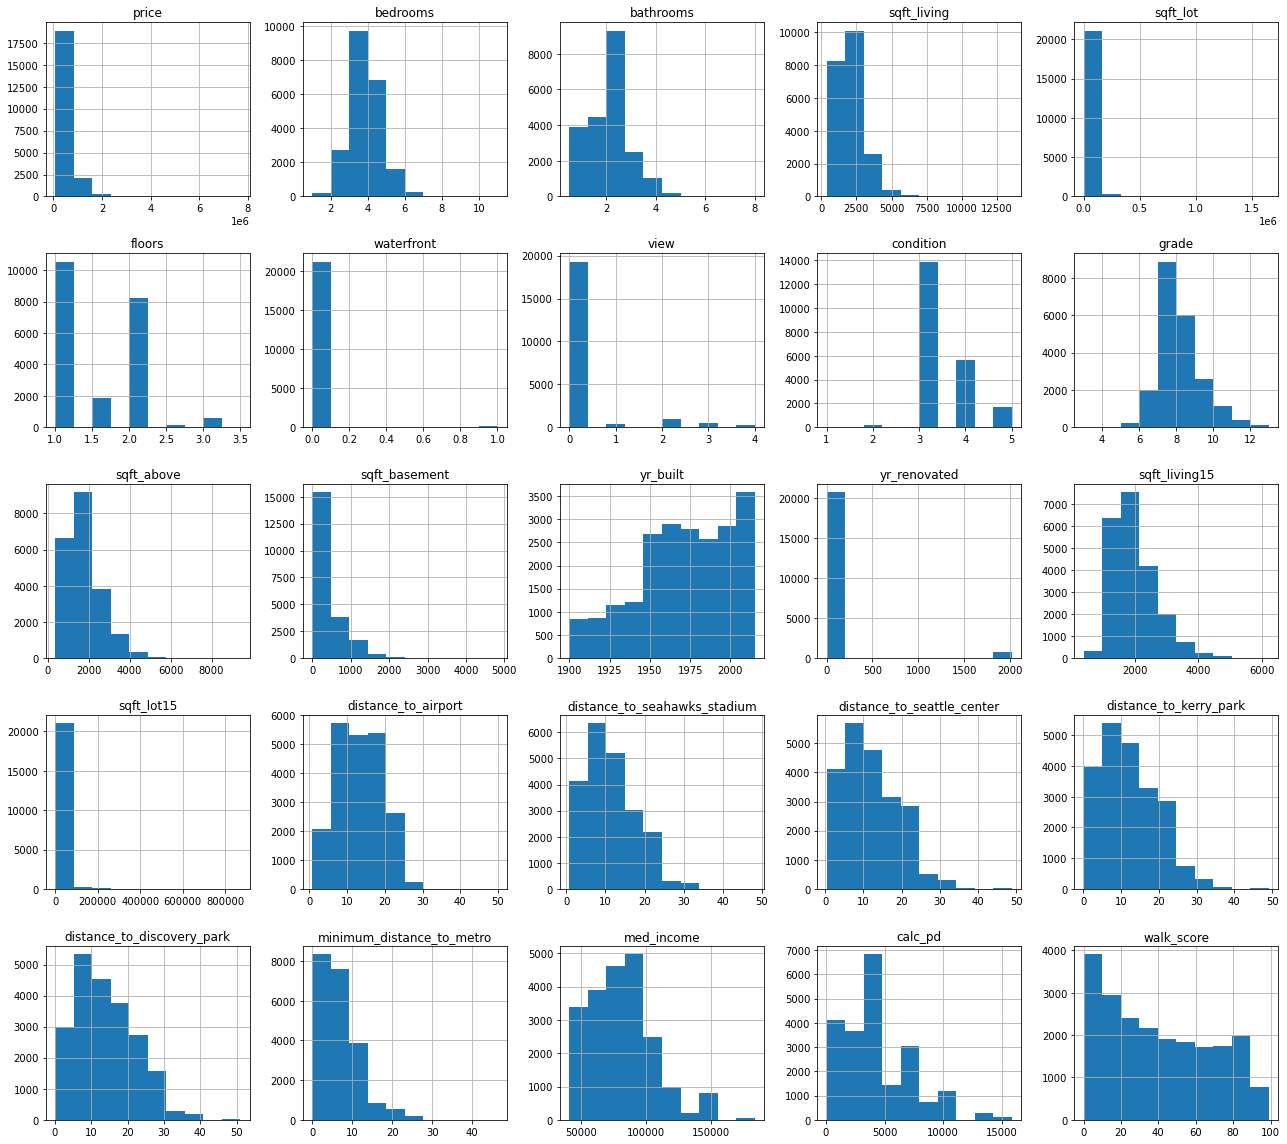

In [11]:
#check the distributions of each of the columns
df.hist(figsize=(18,16));
plt.tight_layout()

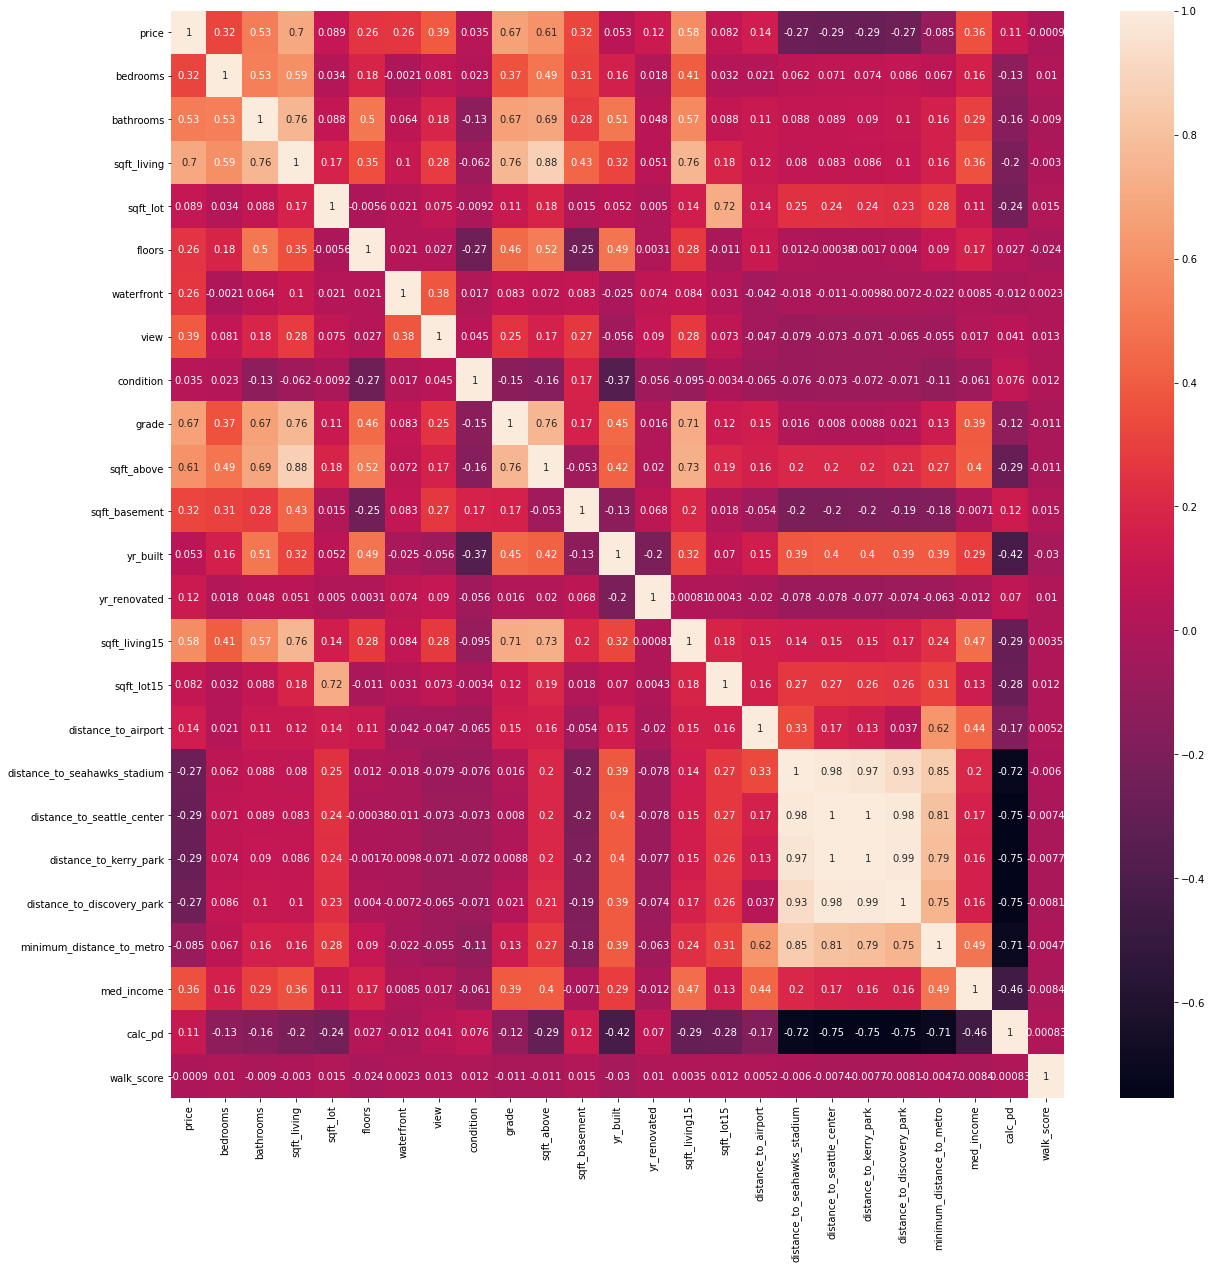

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

We'll use the `yr_built` column to calculate the age of the home and use age as a continuous variable.  We'll also create a new variable called `renovation_age` which is calculated in the same way.  If the house has not been renovated then it will have a renovation age equal to 0.

In [13]:
#create a function to calculate age
def calc_age(x):
    if x == 0:
        age = 0
    else:
        age = 2020 - x
    return age
df['renovation_age'] = df['yr_renovated'].map(calc_age)
df['home_age'] = df['yr_built'].map(calc_age)
df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,distance_to_seahawks_stadium,distance_to_seattle_center,distance_to_kerry_park,distance_to_discovery_park,minimum_distance_to_metro,med_income,calc_pd,walk_score,renovation_age,home_age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,6.771217,8.837087,9.483657,12.249694,1.302968,58707.0,4967.42268,39,0.0,65
1,205425.0,2,1.00,880,6780,1.0,0.0,0.0,4,6,...,7.598140,9.663983,10.310590,13.074902,2.089548,58707.0,4967.42268,62,0.0,75
2,445000.0,3,2.25,2100,8201,1.0,0.0,2.0,3,8,...,7.222682,9.278340,9.927283,12.720516,1.894527,58707.0,4967.42268,23,0.0,53
3,236000.0,3,1.00,1300,5898,1.0,0.0,0.0,3,7,...,7.170015,9.237631,9.883293,12.639671,1.643102,58707.0,4967.42268,29,0.0,59
4,170000.0,2,1.00,860,5265,1.0,0.0,0.0,3,6,...,6.839175,8.907012,9.545065,12.244964,1.264256,58707.0,4967.42268,80,0.0,89


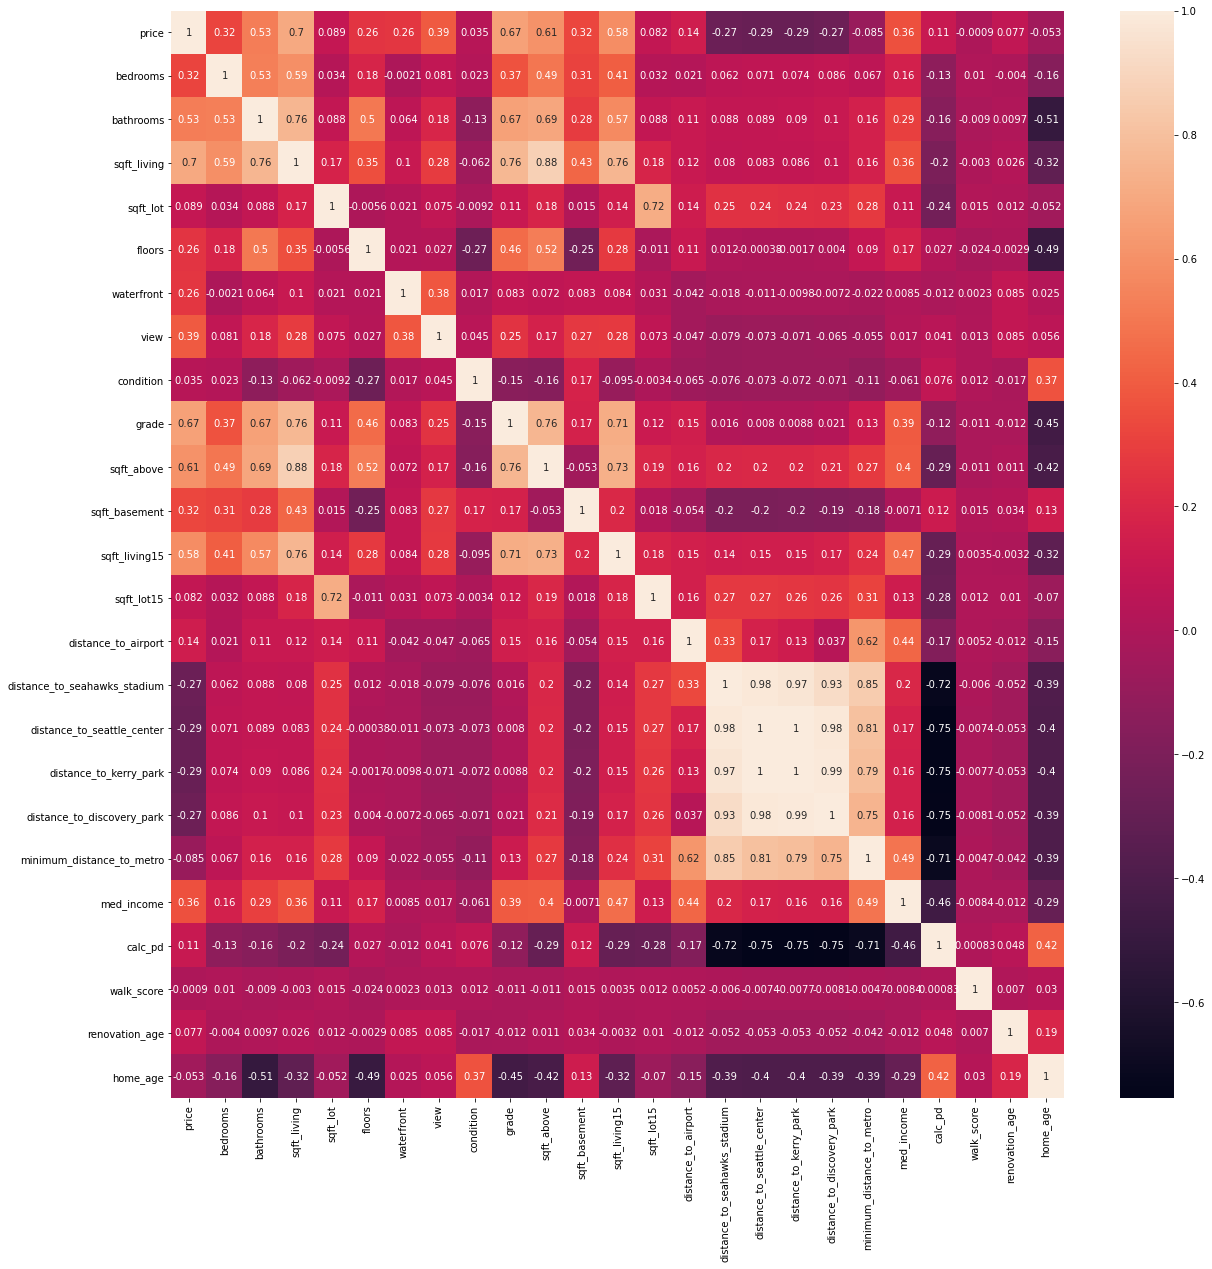

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

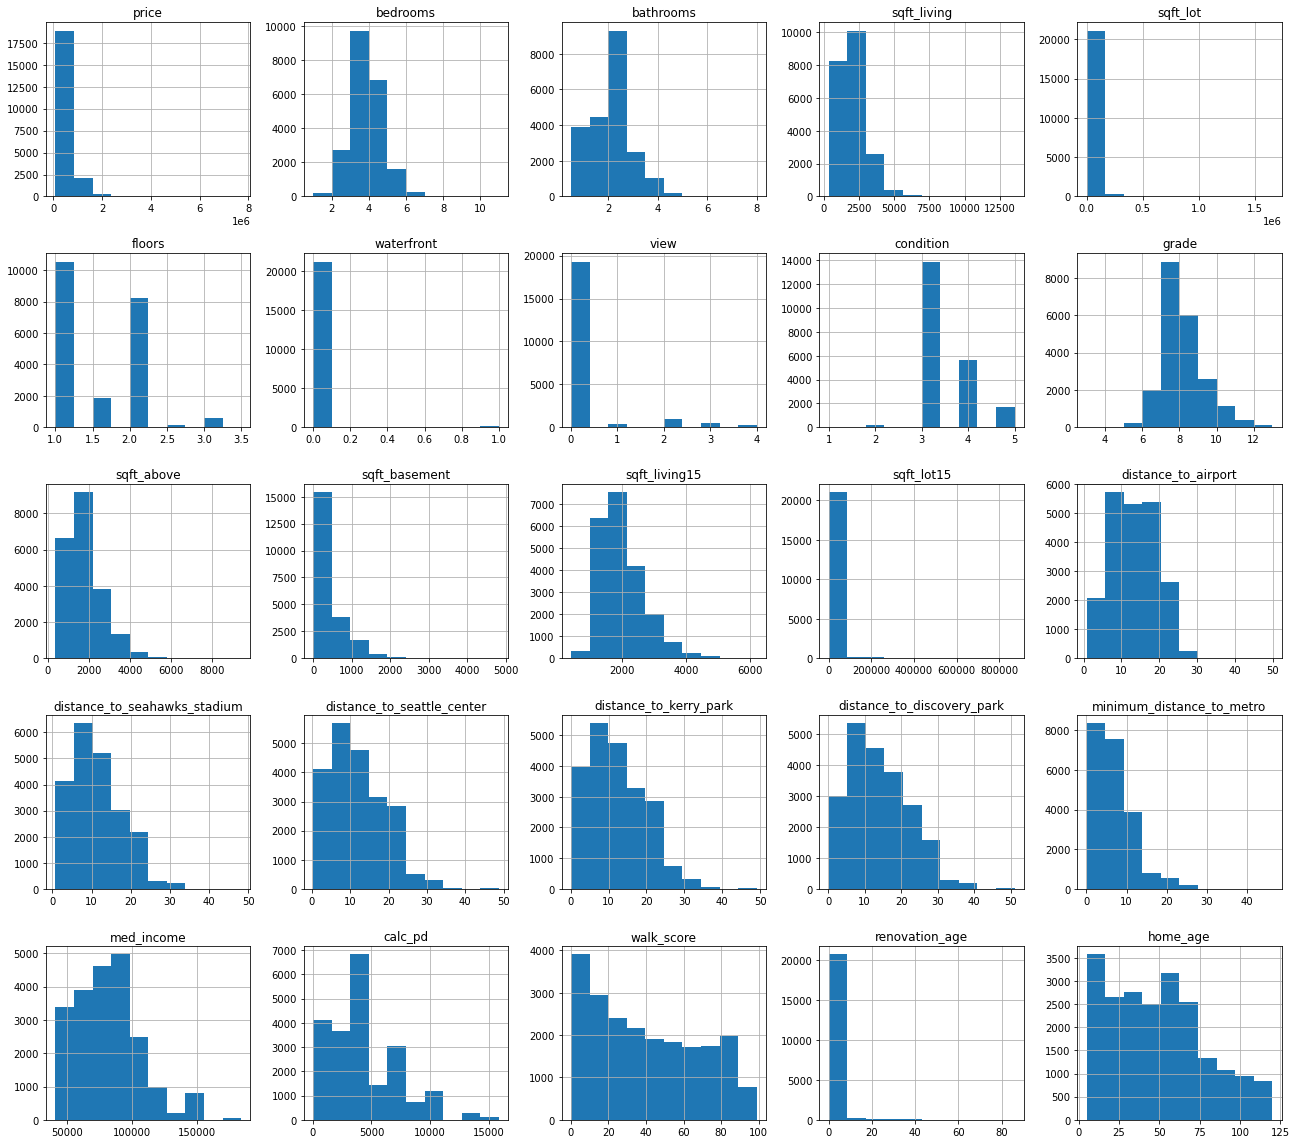

In [15]:
#check the distributions of each of the columns
df.hist(figsize=(18,16));
plt.tight_layout()

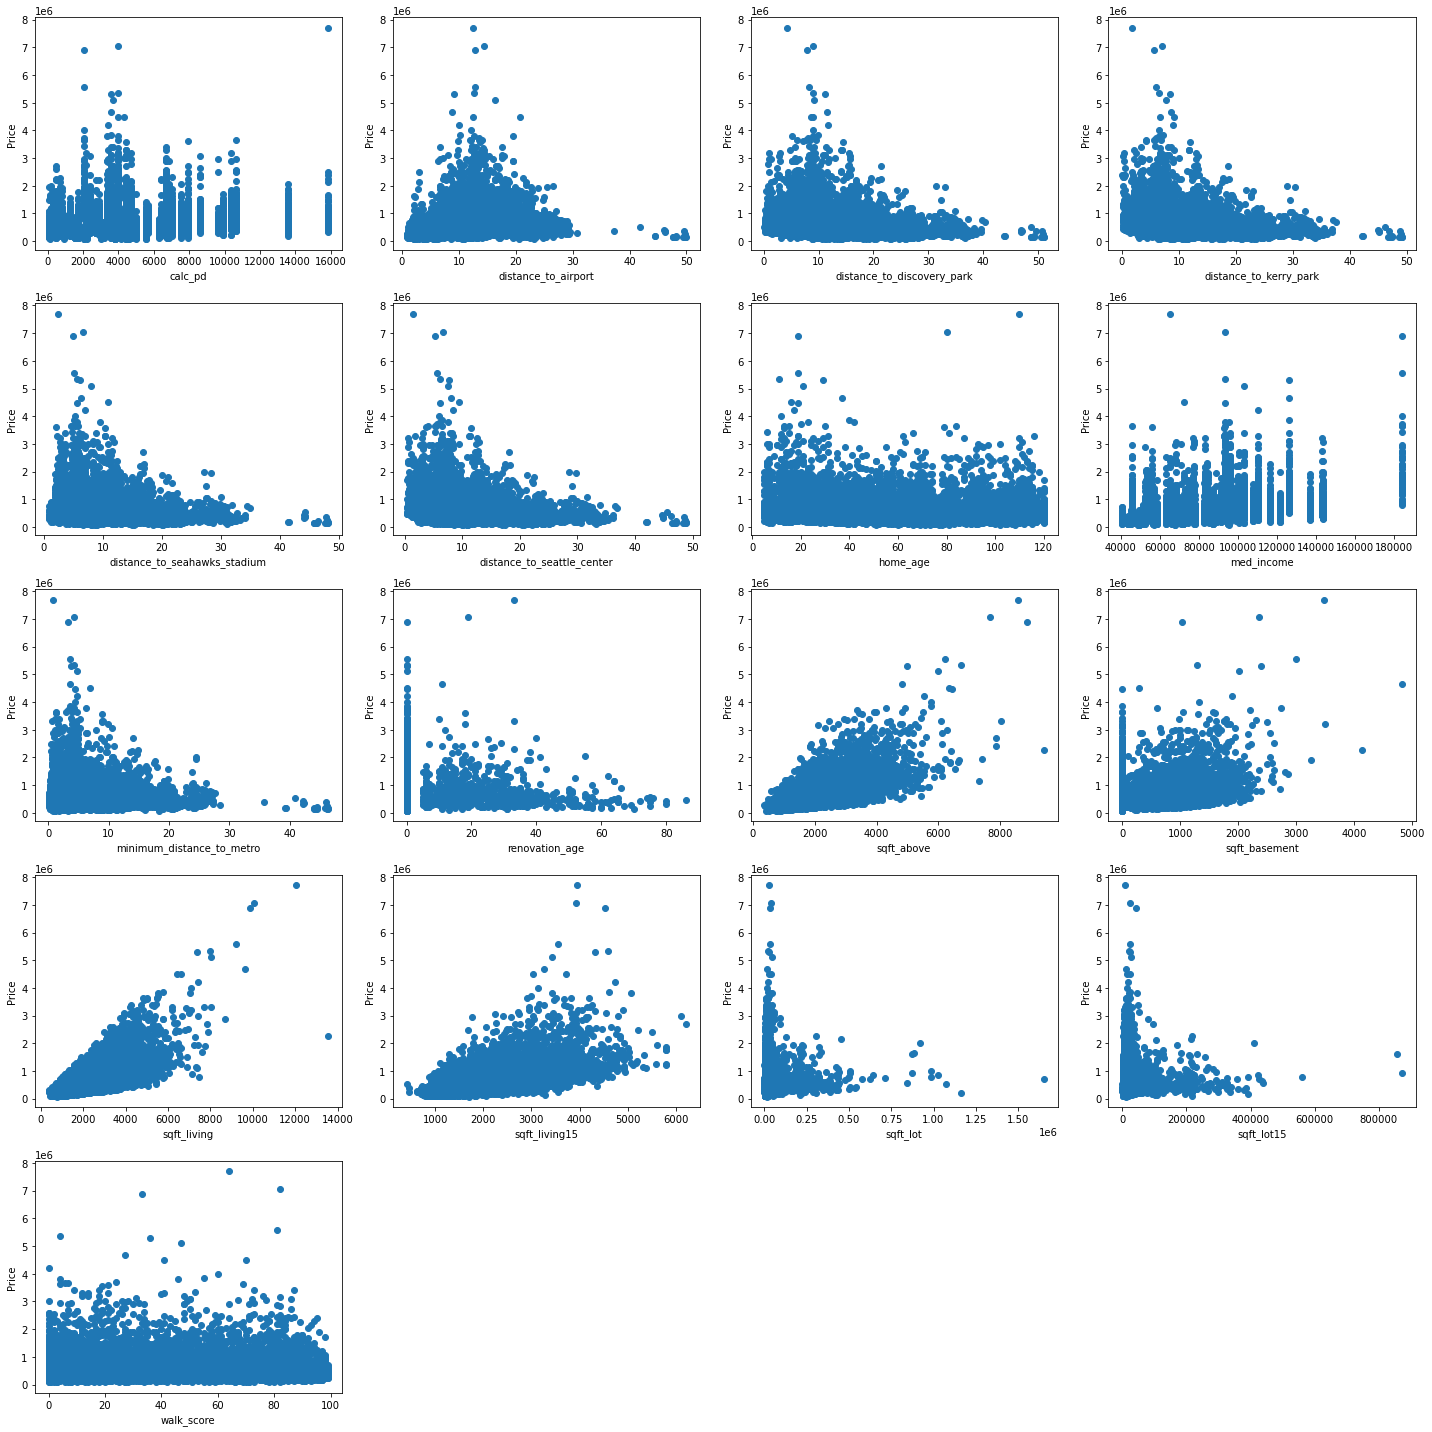

In [16]:
cont_cols = ['calc_pd', 'distance_to_airport', 'distance_to_discovery_park', 'distance_to_kerry_park',
            'distance_to_seahawks_stadium', 'distance_to_seattle_center', 'home_age', 'med_income',
            'minimum_distance_to_metro', 'renovation_age', 'sqft_above', 'sqft_basement', 'sqft_living',
            'sqft_living15', 'sqft_lot', 'sqft_lot15', 'walk_score']
plt.figure(figsize=(20,20))
for i in range(0, len(cont_cols)):
    plt.subplot(5, 4, i+1)
    plt.scatter(df[cont_cols[i]], df['price'])
    plt.xlabel(cont_cols[i])
    plt.ylabel('Price')
plt.tight_layout()

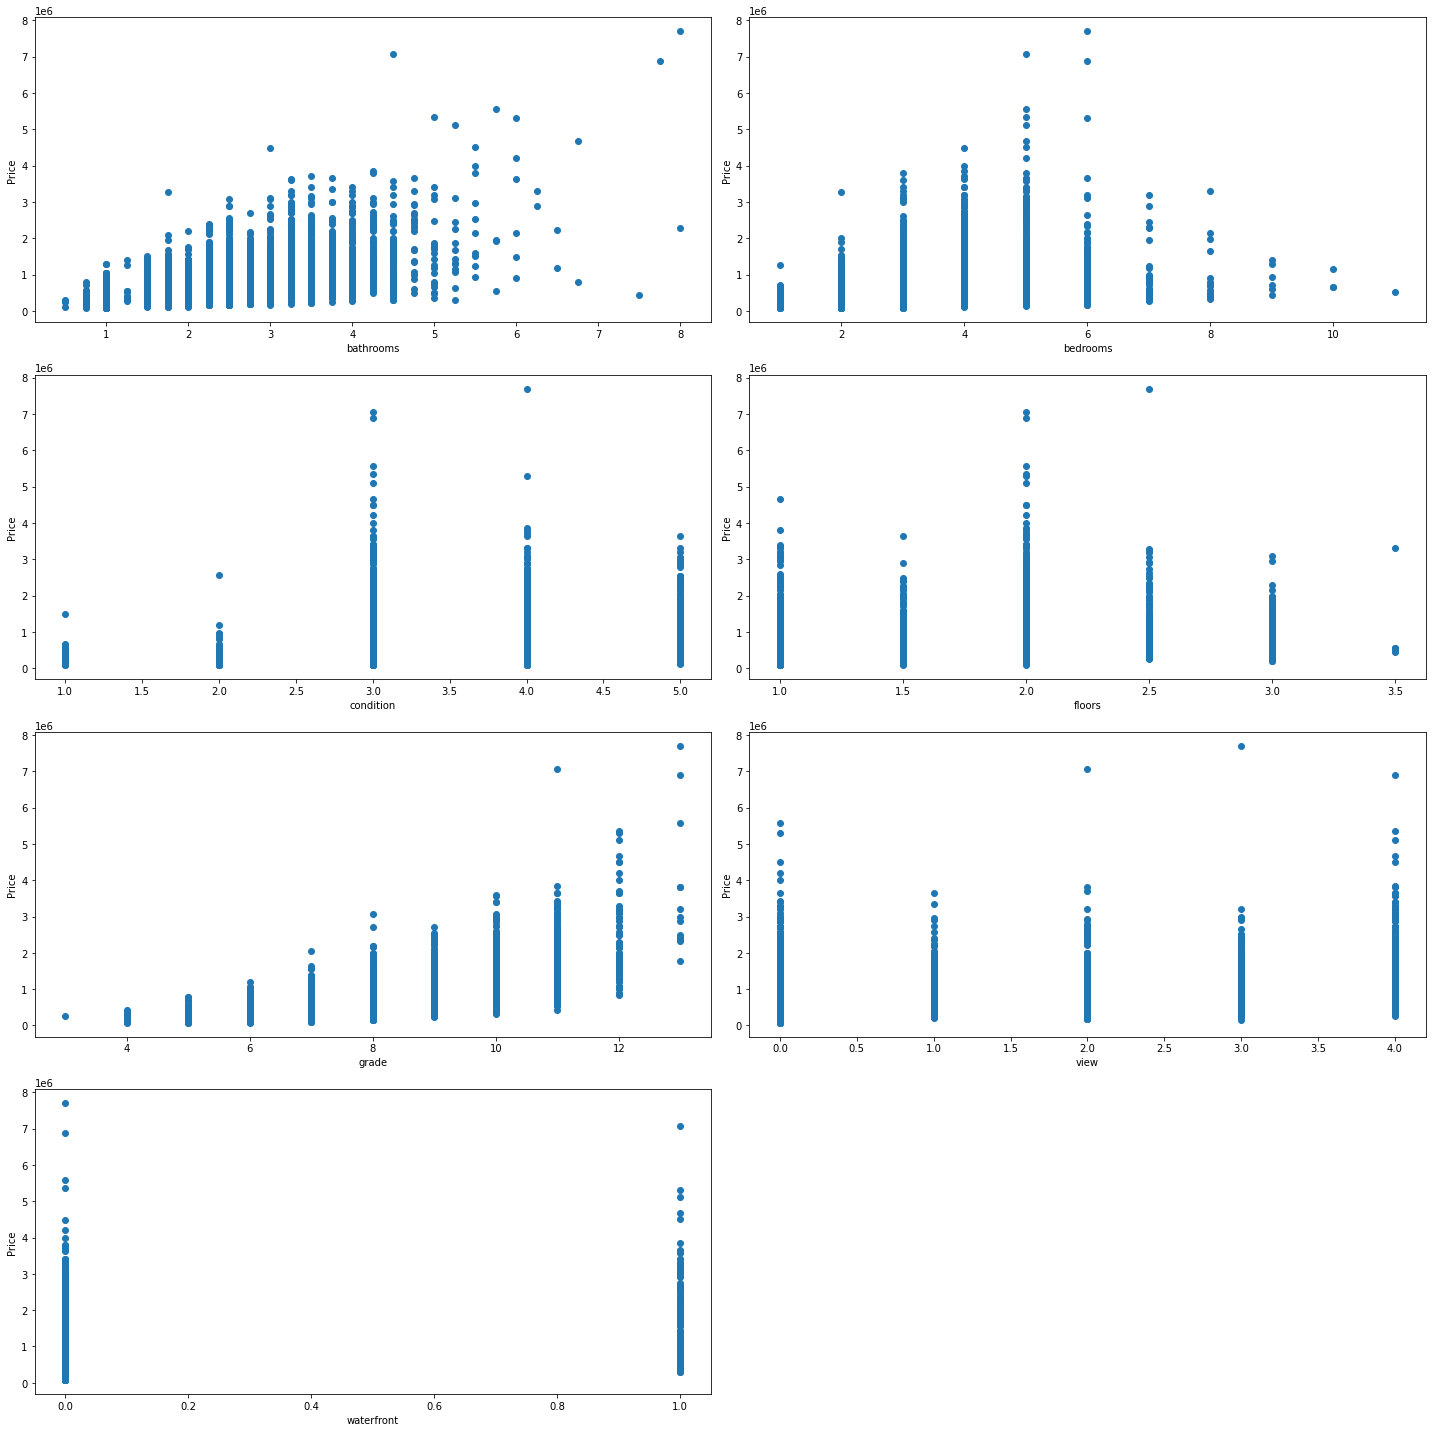

In [17]:
cat_cols = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'view', 'waterfront']
plt.figure(figsize=(20,20))
for i in range(0, len(cat_cols)):
    plt.subplot(4, 2, i+1)
    plt.scatter(df[cat_cols[i]], df['price'])
    plt.xlabel(cat_cols[i])
    plt.ylabel('Price')
plt.tight_layout()